<a href="https://colab.research.google.com/github/Devanshi-123/stock_market_prediction/blob/main/Stock_Market_Prediction(Petroleum).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Stock Market Prediction Using Different Machine Learning And Deep Learning Algorithms**


## **Importing the necessary libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
cd /content/drive/My Drive/Stock Market Prediction(Mini Project)

/content/drive/My Drive/Stock Market Prediction(Mini Project)


## **Importing the dataset**

In [7]:
##Metallic Dataset
df=pd.read_csv("Stock_PETR1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4087 entries, 0 to 4086
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4087 non-null   int64  
 1   <TICKER>      4087 non-null   object 
 2   <DTYYYYMMDD>  4087 non-null   int64  
 3   <FIRST>       4087 non-null   float64
 4   <HIGH>        4087 non-null   float64
 5   <LOW>         4087 non-null   float64
 6   <CLOSE>       4087 non-null   float64
 7   <VALUE>       4087 non-null   int64  
 8   <VOL>         4087 non-null   int64  
 9   <OPENINT>     4087 non-null   int64  
 10  <PER>         4087 non-null   object 
 11  <OPEN>        4087 non-null   float64
 12  <LAST>        4087 non-null   float64
dtypes: float64(6), int64(5), object(2)
memory usage: 415.2+ KB


In [75]:
df.head()

,Unnamed: 0,<TICKER>,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<PER>,<OPEN>,<LAST>,datetime
datetime,,,,,,,,,,,,,,
2001-03-25,0,Petro..Inv.,20010325,2140.0,2140.0,2139.0,2140.0,349714320,163488,15,D,2140.0,2140.0,2001-03-25
2001-03-26,1,Petro..Inv.,20010326,2135.0,2136.0,2100.0,2100.0,37030936,17577,18,D,2140.0,2100.0,2001-03-26
2001-03-27,2,Petro..Inv.,20010327,2100.0,2100.0,2045.0,2050.0,200173239,97608,51,D,2100.0,2050.0,2001-03-27
2001-03-28,3,Petro..Inv.,20010328,2049.0,2100.0,2020.0,2100.0,120265895,59019,39,D,2050.0,2100.0,2001-03-28
2001-03-31,4,Petro..Inv.,20010331,2101.0,2205.0,2100.0,2205.0,187171518,85296,37,D,2100.0,2205.0,2001-03-31


## **Exploratory Data Analysis**

In [8]:
df.describe()

,Unnamed: 0,<DTYYYYMMDD>,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,<OPENINT>,<OPEN>,<LAST>
count,4087.000000,4.087000e+03,4087.000000,4087.000000,4087.000000,4087.000000,4.087000e+03,4.087000e+03,4087.000000,4087.000000,4087.000000
mean,2043.000000,2.010508e+07,2314.985075,2354.750918,2270.214583,2315.438953,8.081839e+09,2.544001e+06,307.725471,2311.123073,2312.586004
std,1179.959604,5.619828e+04,2370.609602,2423.969382,2305.411326,2366.676940,2.214442e+10,4.476661e+06,423.435746,2351.547232,2367.453351
min,0.000000,2.001032e+07,491.000000,491.000000,491.000000,506.000000,5.710000e+03,1.000000e+01,1.000000,506.000000,491.000000
25%,1021.500000,2.005122e+07,999.000000,1007.500000,985.000000,1003.000000,3.315275e+08,1.977020e+05,63.000000,1003.000000,993.000000
50%,2043.000000,2.011041e+07,1730.000000,1755.000000,1690.000000,1725.000000,1.476633e+09,9.672930e+05,164.000000,1724.000000,1723.000000
75%,3064.500000,2.015091e+07,2522.000000,2565.000000,2500.000000,2529.000000,5.431455e+09,2.888838e+06,360.500000,2529.000000,2527.000000
max,4086.000000,2.020060e+07,22000.000000,22500.000000,21482.000000,21483.000000,3.370985e+11,8.097697e+07,4276.000000,21483.000000,21483.000000


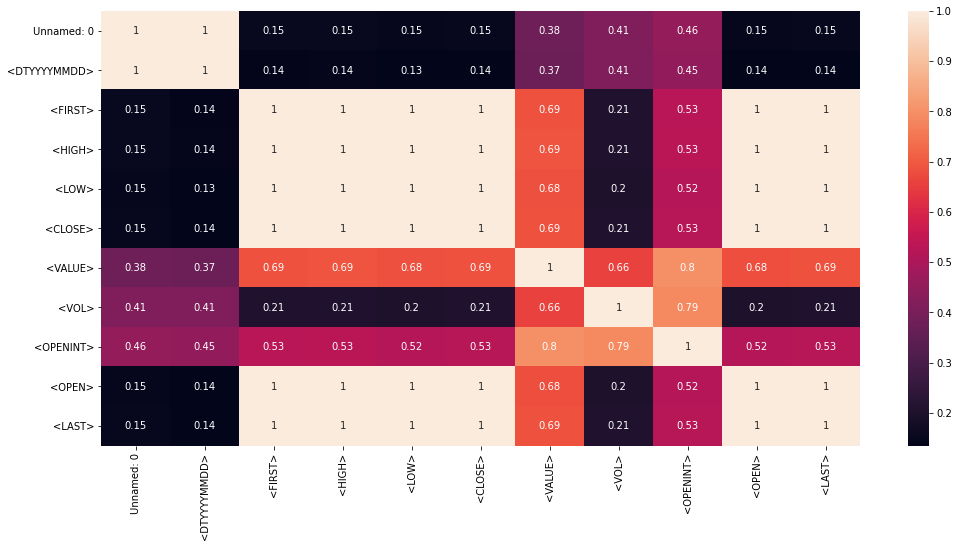

In [9]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(df.corr(), annot = True)

In [10]:
df['datetime'] = pd.to_datetime(df['<DTYYYYMMDD>'], format='%Y%m%d')
df.index = df['datetime']
df.dropna()
df_new = df[["<FIRST>","<HIGH>","<LOW>","<CLOSE>","<VALUE>","<VOL>"]]
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>
datetime,,,,,,
2001-03-25,2140.0,2140.0,2139.0,2140.0,349714320,163488
2001-03-26,2135.0,2136.0,2100.0,2100.0,37030936,17577
2001-03-27,2100.0,2100.0,2045.0,2050.0,200173239,97608
2001-03-28,2049.0,2100.0,2020.0,2100.0,120265895,59019
2001-03-31,2101.0,2205.0,2100.0,2205.0,187171518,85296


In [11]:
df_new.shape

(4087, 6)

In [12]:
#Calculating the change in price
df_new['change_in_price'] = df_new['<CLOSE>'].diff()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## **Data Visualisation**

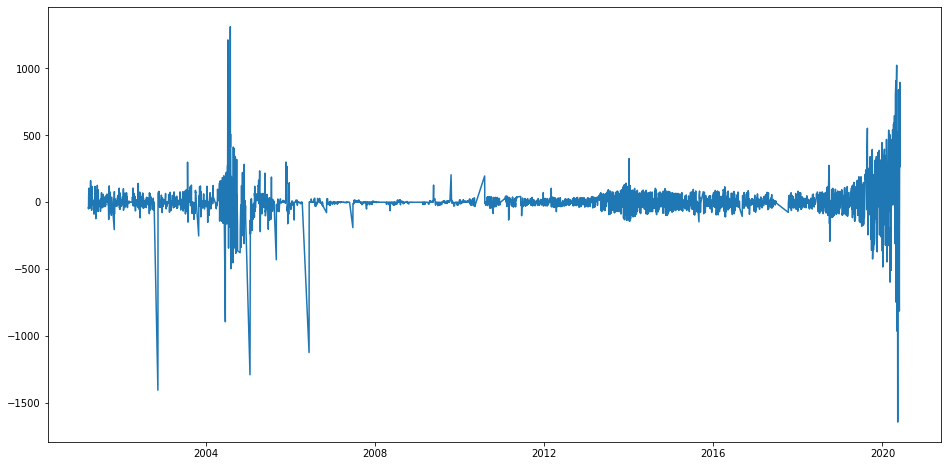

In [13]:
plt.figure(figsize=(16,8))
plt.plot(df_new['change_in_price'], label='Change In Price')

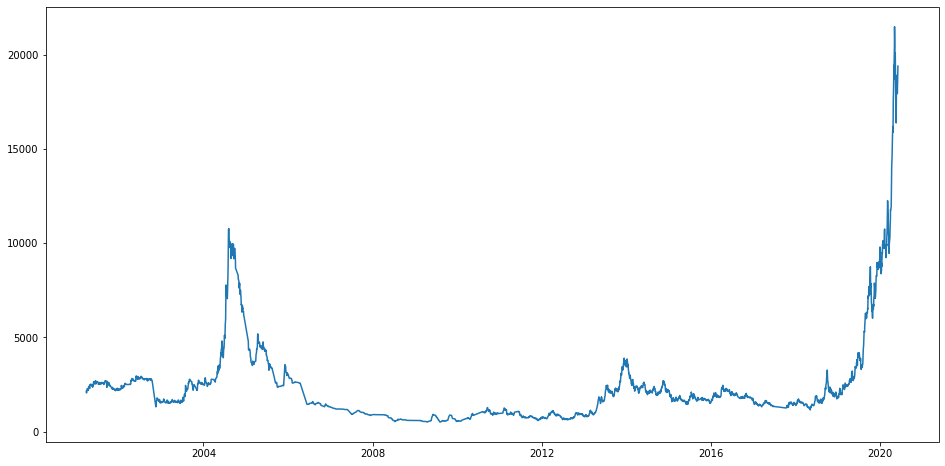

In [14]:
plt.figure(figsize=(16,8))
plt.plot(df_new['<CLOSE>'], label='Close Price history')

## **Calculating the technical indicators**

In [15]:
#1. Simple n day moving average
#A moving average (MA) is a widely used technical indicator that smooths out price trends by filtering out the “noise” from random short-term price fluctuations.
##The most common applications of moving averages are to identify trend direction and to determine support and resistance levels.
def moving_average(df, n):
    """Calculate the moving average for the given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    MA = pd.Series(df['<CLOSE>'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    df = df.join(MA)
    return df
df_new = moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10
datetime,,,,,,,,
2020-05-26,18000.0,18417.0,17960.0,18092.0,41636609960,2316851,-813.0,17926.7
2020-05-27,17186.0,18990.0,17186.0,17928.0,115006593572,6415054,-164.0,17761.4
2020-05-30,18824.0,18824.0,18401.0,18823.0,128426052100,6822804,895.0,17849.8
2020-05-31,17882.0,19690.0,17882.0,19087.0,70489687776,3692994,264.0,18004.2
2020-06-01,19980.0,19997.0,19096.0,19392.0,62242497958,3209736,305.0,18264.2


In [16]:
#2. Weighted Moving Average (WMA)
def weighted_moving_average(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    WMA = pd.Series(df['<CLOSE>'].ewm(span=n, min_periods=n).mean(), name='WMA_' + str(n))
    df = df.join(WMA)
    return df
df_new = weighted_moving_average(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10
datetime,,,,,,,,,
2020-05-26,18000.0,18417.0,17960.0,18092.0,41636609960,2316851,-813.0,17926.7,18259.663642
2020-05-27,17186.0,18990.0,17186.0,17928.0,115006593572,6415054,-164.0,17761.4,18199.361162
2020-05-30,18824.0,18824.0,18401.0,18823.0,128426052100,6822804,895.0,17849.8,18312.750041
2020-05-31,17882.0,19690.0,17882.0,19087.0,70489687776,3692994,264.0,18004.2,18453.522761
2020-06-01,19980.0,19997.0,19096.0,19392.0,62242497958,3209736,305.0,18264.2,18624.154986


In [17]:
#3. Momentum
def momentum(df, n):
    """
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    M = pd.Series(df['<CLOSE>'].diff(n), name='MOM_' + str(n))
    df = df.join(M)
    return df
df_new = momentum(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10
datetime,,,,,,,,,,
2020-05-26,18000.0,18417.0,17960.0,18092.0,41636609960,2316851,-813.0,17926.7,18259.663642,-2014.0
2020-05-27,17186.0,18990.0,17186.0,17928.0,115006593572,6415054,-164.0,17761.4,18199.361162,-1653.0
2020-05-30,18824.0,18824.0,18401.0,18823.0,128426052100,6822804,895.0,17849.8,18312.750041,884.0
2020-05-31,17882.0,19690.0,17882.0,19087.0,70489687776,3692994,264.0,18004.2,18453.522761,1544.0
2020-06-01,19980.0,19997.0,19096.0,19392.0,62242497958,3209736,305.0,18264.2,18624.154986,2600.0


In [18]:
#4. Stochastic K%
def stochastic_oscillator_k(df):
    """Calculate stochastic oscillator %K for given data.
    :param df: pandas.DataFrame
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO_k')
    df = df.join(SOk)
    return df
df_new = stochastic_oscillator_k(df_new)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k
datetime,,,,,,,,,,,
2020-05-26,18000.0,18417.0,17960.0,18092.0,41636609960,2316851,-813.0,17926.7,18259.663642,-2014.0,0.288840
2020-05-27,17186.0,18990.0,17186.0,17928.0,115006593572,6415054,-164.0,17761.4,18199.361162,-1653.0,0.411308
2020-05-30,18824.0,18824.0,18401.0,18823.0,128426052100,6822804,895.0,17849.8,18312.750041,884.0,0.997636
2020-05-31,17882.0,19690.0,17882.0,19087.0,70489687776,3692994,264.0,18004.2,18453.522761,1544.0,0.666482
2020-06-01,19980.0,19997.0,19096.0,19392.0,62242497958,3209736,305.0,18264.2,18624.154986,2600.0,0.328524


In [19]:
#5. Stochastic D%
def stochastic_oscillator_d(df, n):
    """Calculate stochastic oscillator %D for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    SOk = pd.Series((df['<CLOSE>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']), name='SO%k')
    SOd = pd.Series(SOk.ewm(span=n, min_periods=n).mean(), name='SO_' + str(n))
    df = df.join(SOd)
    return df
df_new = stochastic_oscillator_d(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10
datetime,,,,,,,,,,,,
2020-05-26,18000.0,18417.0,17960.0,18092.0,41636609960,2316851,-813.0,17926.7,18259.663642,-2014.0,0.288840,0.539398
2020-05-27,17186.0,18990.0,17186.0,17928.0,115006593572,6415054,-164.0,17761.4,18199.361162,-1653.0,0.411308,0.516099
2020-05-30,18824.0,18824.0,18401.0,18823.0,128426052100,6822804,895.0,17849.8,18312.750041,884.0,0.997636,0.603680
2020-05-31,17882.0,19690.0,17882.0,19087.0,70489687776,3692994,264.0,18004.2,18453.522761,1544.0,0.666482,0.615102
2020-06-01,19980.0,19997.0,19096.0,19392.0,62242497958,3209736,305.0,18264.2,18624.154986,2600.0,0.328524,0.562985


In [20]:
#6. Relative Strength Index
#Error
"""
def relative_strength_index(df, n):
    Calculate Relative Strength Index(RSI) for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    i = df.index[0]
    UpI = [0]
    DoI = [0]
    while i + 1 <= df.index[-1]:
        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])
        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])
        if UpMove > DoMove and UpMove > 0:
            UpD = UpMove
        else:
            UpD = 0
        UpI.append(UpD)
        if DoMove > UpMove and DoMove > 0:
            DoD = DoMove
        else:
            DoD = 0
        DoI.append(DoD)
        i = i + 1
    UpI = pd.Series(UpI)

    DoI = pd.Series(DoI)
    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())
    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())

    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))
    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['RSI_' + str(n)])
    rsi = rsi.set_index(df.index)
    df = df.join(rsi)
    return df
"""

"\ndef relative_strength_index(df, n):\n    Calculate Relative Strength Index(RSI) for given data.\n    :param df: pandas.DataFrame\n    :param n:\n    :return: pandas.DataFrame\n    i = df.index[0]\n    UpI = [0]\n    DoI = [0]\n    while i + 1 <= df.index[-1]:\n        UpMove = float(df.loc[i + 1, 'high']) - float(df.loc[i, 'high'])\n        DoMove = float(df.loc[i, 'low']) - float(df.loc[i + 1, 'low'])\n        if UpMove > DoMove and UpMove > 0:\n            UpD = UpMove\n        else:\n            UpD = 0\n        UpI.append(UpD)\n        if DoMove > UpMove and DoMove > 0:\n            DoD = DoMove\n        else:\n            DoD = 0\n        DoI.append(DoD)\n        i = i + 1\n    UpI = pd.Series(UpI)\n\n    DoI = pd.Series(DoI)\n    PosDI = pd.Series(UpI.ewm(span=n, min_periods=n).mean())\n    NegDI = pd.Series(DoI.ewm(span=n, min_periods=n).mean())\n\n    # rsi = pd.Series(PosDI / (PosDI + NegDI), name='RSI_' + str(n))\n    rsi = pd.DataFrame(PosDI / (PosDI + NegDI), columns=['R

In [21]:
#7. Signal
def macd(df, n_fast, n_slow):
    """Calculate MACD, MACD Signal and MACD difference
    :param df: pandas.DataFrame
    :param n_fast:
    :param n_slow:
    :return: pandas.DataFrame
    """
    EMAfast = pd.Series(df['<CLOSE>'].ewm(span=n_fast, min_periods=n_slow).mean())
    EMAslow = pd.Series(df['<CLOSE>'].ewm(span=n_slow, min_periods=n_slow).mean())
    MACD = pd.Series(EMAfast - EMAslow, name='MACD_' + str(n_fast) + '_' + str(n_slow))
    MACDsign = pd.Series(MACD.ewm(span=9, min_periods=9).mean(), name='MACDsign_' + str(n_fast) + '_' + str(n_slow))
    MACDdiff = pd.Series(MACD - MACDsign, name='MACDdiff_' + str(n_fast) + '_' + str(n_slow))
    df = df.join(MACD)
    df = df.join(MACDsign)
    df = df.join(MACDdiff)
    return df
df_new = macd(df_new,12,26)
df_new.head()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26
datetime,,,,,,,,,,,,,,,
2001-03-25,2140.0,2140.0,2139.0,2140.0,349714320,163488,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
2001-03-26,2135.0,2136.0,2100.0,2100.0,37030936,17577,-40.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
2001-03-27,2100.0,2100.0,2045.0,2050.0,200173239,97608,-50.0,NaN,NaN,NaN,0.090909,NaN,NaN,NaN,NaN
2001-03-28,2049.0,2100.0,2020.0,2100.0,120265895,59019,50.0,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
2001-03-31,2101.0,2205.0,2100.0,2205.0,187171518,85296,105.0,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN


In [22]:
#8. Larry Williams R%
#lEFT

In [23]:
#9. Accumulation / Distribution
def accumulation_distribution(df, n):
    """Calculate Accumulation/Distribution for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    ad = (2 * df['<CLOSE>'] - df['<HIGH>'] - df['<LOW>']) / (df['<HIGH>'] - df['<LOW>']) * df['<VOL>']
    M = ad.diff(n - 1)
    N = ad.shift(n - 1)
    ROC = M / N
    AD = pd.Series(ROC, name='Acc/Dist_ROC_' + str(n))
    df = df.join(AD)
    return df
df_new = accumulation_distribution(df_new,10)
df_new.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/algorithms.py:1977: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10
datetime,,,,,,,,,,,,,,,,
2020-05-26,18000.0,18417.0,17960.0,18092.0,41636609960,2316851,-813.0,17926.7,18259.663642,-2014.0,0.288840,0.539398,617.206061,951.060144,-333.854083,-0.652602
2020-05-27,17186.0,18990.0,17186.0,17928.0,115006593572,6415054,-164.0,17761.4,18199.361162,-1653.0,0.411308,0.516099,544.399044,869.727924,-325.328879,0.202279
2020-05-30,18824.0,18824.0,18401.0,18823.0,128426052100,6822804,895.0,17849.8,18312.750041,884.0,0.997636,0.603680,552.548544,806.292048,-253.743504,-2.330912
2020-05-31,17882.0,19690.0,17882.0,19087.0,70489687776,3692994,264.0,18004.2,18453.522761,1544.0,0.666482,0.615102,573.696459,759.772930,-186.076471,-1.665997
2020-06-01,19980.0,19997.0,19096.0,19392.0,62242497958,3209736,305.0,18264.2,18624.154986,2600.0,0.328524,0.562985,608.057971,729.429938,-121.371967,-0.668024


In [24]:
#10. Commodity Channel Index
def commodity_channel_index(df, n):
    """Calculate Commodity Channel Index for given data.
    :param df: pandas.DataFrame
    :param n:
    :return: pandas.DataFrame
    """
    PP = (df['<HIGH>'] + df['<LOW>'] + df['<CLOSE>']) / 3
    CCI = pd.Series((PP - PP.rolling(n, min_periods=n).mean()) / PP.rolling(n, min_periods=n).std(),
                    name='CCI_' + str(n))
    df = df.join(CCI)
    return df
df_new = commodity_channel_index(df_new,10)
df_new.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,,
2020-05-26,18000.0,18417.0,17960.0,18092.0,41636609960,2316851,-813.0,17926.7,18259.663642,-2014.0,0.288840,0.539398,617.206061,951.060144,-333.854083,-0.652602,0.177397
2020-05-27,17186.0,18990.0,17186.0,17928.0,115006593572,6415054,-164.0,17761.4,18199.361162,-1653.0,0.411308,0.516099,544.399044,869.727924,-325.328879,0.202279,0.309628
2020-05-30,18824.0,18824.0,18401.0,18823.0,128426052100,6822804,895.0,17849.8,18312.750041,884.0,0.997636,0.603680,552.548544,806.292048,-253.743504,-2.330912,1.020630
2020-05-31,17882.0,19690.0,17882.0,19087.0,70489687776,3692994,264.0,18004.2,18453.522761,1544.0,0.666482,0.615102,573.696459,759.772930,-186.076471,-1.665997,1.056782
2020-06-01,19980.0,19997.0,19096.0,19392.0,62242497958,3209736,305.0,18264.2,18624.154986,2600.0,0.328524,0.562985,608.057971,729.429938,-121.371967,-0.668024,1.396910


In [25]:
df_new.mean()

<FIRST>            2.314985e+03
<HIGH>             2.354751e+03
<LOW>              2.270215e+03
<CLOSE>            2.315439e+03
<VALUE>            8.081839e+09
<VOL>              2.544001e+06
change_in_price    4.222222e+00
MA_10              2.297528e+03
WMA_10             2.297644e+03
MOM_10             3.948173e+01
SO_k                        NaN
SO_10              5.351231e-01
MACD_12_26         2.610116e+01
MACDsign_12_26     2.537952e+01
MACDdiff_12_26     6.755629e-01
Acc/Dist_ROC_10             NaN
CCI_10            -6.896271e-02
dtype: float64

In [26]:
df_new.min()

<FIRST>             491.000000
<HIGH>              491.000000
<LOW>               491.000000
<CLOSE>             506.000000
<VALUE>            5710.000000
<VOL>                10.000000
change_in_price   -1642.000000
MA_10               515.100000
WMA_10              518.418291
MOM_10            -4300.000000
SO_k                      -inf
SO_10                -4.641678
MACD_12_26         -833.183394
MACDsign_12_26     -759.151369
MACDdiff_12_26     -663.921320
Acc/Dist_ROC_10           -inf
CCI_10               -2.846050
dtype: float64

In [27]:
df_new.max()

<FIRST>            2.200000e+04
<HIGH>             2.250000e+04
<LOW>              2.148200e+04
<CLOSE>            2.148300e+04
<VALUE>            3.370985e+11
<VOL>              8.097697e+07
change_in_price    1.311000e+03
MA_10              2.005040e+04
WMA_10             1.964120e+04
MOM_10             5.604000e+03
SO_k                        inf
SO_10              7.132721e+00
MACD_12_26         2.305244e+03
MACDsign_12_26     2.060763e+03
MACDdiff_12_26     4.236789e+02
Acc/Dist_ROC_10             inf
CCI_10             2.839801e+00
dtype: float64

In [28]:
df_new.std()

<FIRST>            2.370610e+03
<HIGH>             2.423969e+03
<LOW>              2.305411e+03
<CLOSE>            2.366677e+03
<VALUE>            2.214442e+10
<VOL>              4.476661e+06
change_in_price    1.131251e+02
MA_10              2.297954e+03
WMA_10             2.293439e+03
MOM_10             4.988782e+02
SO_k                        NaN
SO_10              3.134283e-01
MACD_12_26         2.073677e+02
MACDsign_12_26     1.981625e+02
MACDdiff_12_26     5.159681e+01
Acc/Dist_ROC_10             NaN
CCI_10             1.261867e+00
dtype: float64

## **Normalizing Data**

In [29]:
data = (df_new - df_new.mean()) / (df_new.max() - df_new.min())
data.tail()

,<FIRST>,<HIGH>,<LOW>,<CLOSE>,<VALUE>,<VOL>,change_in_price,MA_10,WMA_10,MOM_10,SO_k,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,Acc/Dist_ROC_10,CCI_10
datetime,,,,,,,,,,,,,,,,,
2020-05-26,0.729230,0.729804,0.747453,0.752089,0.099540,-0.002805,-0.276743,0.800048,0.834712,-0.207339,NaN,0.000363,0.188344,0.328266,-0.307585,NaN,0.043329
2020-05-27,0.691386,0.755838,0.710580,0.744270,0.317191,0.047804,-0.056967,0.791586,0.831559,-0.170889,NaN,-0.001616,0.165146,0.299423,-0.299747,NaN,0.066585
2020-05-30,0.767540,0.748296,0.768462,0.786936,0.357000,0.052840,0.301652,0.796111,0.837488,0.085270,NaN,0.005823,0.167742,0.276928,-0.233927,NaN,0.191632
2020-05-31,0.723744,0.787644,0.743737,0.799521,0.185132,0.014189,0.087971,0.804015,0.844850,0.151910,NaN,0.006793,0.174481,0.260431,-0.171710,NaN,0.197991
2020-06-01,0.821285,0.801592,0.801571,0.814061,0.160667,0.008221,0.101855,0.817324,0.853773,0.258534,NaN,0.002366,0.185429,0.249671,-0.112217,NaN,0.257811


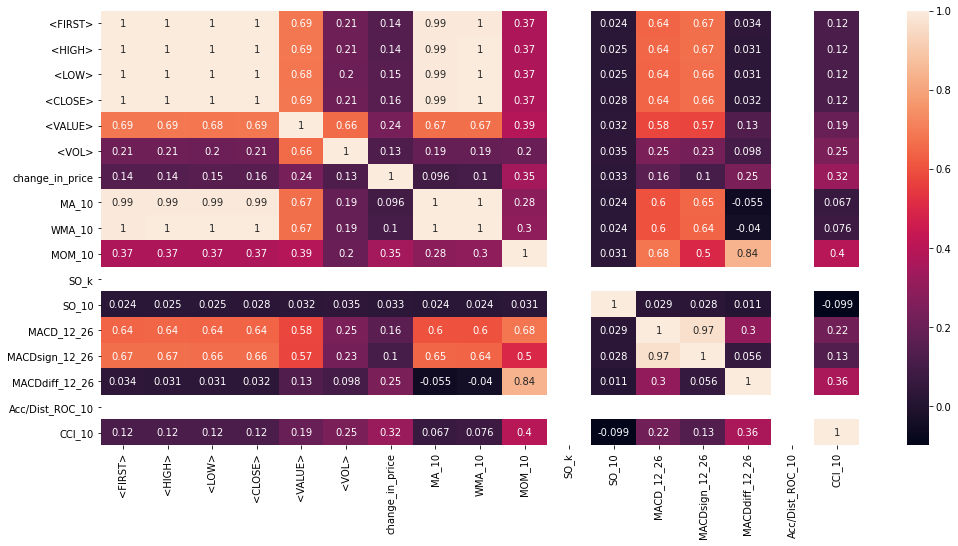

In [30]:
import seaborn as sns
plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(data.corr(), annot = True)

In [31]:
#To check null values
data.isnull().sum()

<FIRST>               0
<HIGH>                0
<LOW>                 0
<CLOSE>               0
<VALUE>               0
<VOL>                 0
change_in_price       1
MA_10                 9
WMA_10                9
MOM_10               10
SO_k               4087
SO_10                 9
MACD_12_26           25
MACDsign_12_26       33
MACDdiff_12_26       33
Acc/Dist_ROC_10    4087
CCI_10                9
dtype: int64

In [32]:
#Removing the null values
data = data.fillna(data.mean())

In [33]:
data = data.dropna(how="all",axis=1)

In [34]:
##Defining the features and labels
X = data.iloc[:,7:]
X.tail()

,MA_10,WMA_10,MOM_10,SO_10,MACD_12_26,MACDsign_12_26,MACDdiff_12_26,CCI_10
datetime,,,,,,,,
2020-05-26,0.800048,0.834712,-0.207339,0.000363,0.188344,0.328266,-0.307585,0.043329
2020-05-27,0.791586,0.831559,-0.170889,-0.001616,0.165146,0.299423,-0.299747,0.066585
2020-05-30,0.796111,0.837488,0.085270,0.005823,0.167742,0.276928,-0.233927,0.191632
2020-05-31,0.804015,0.844850,0.151910,0.006793,0.174481,0.260431,-0.171710,0.197991
2020-06-01,0.817324,0.853773,0.258534,0.002366,0.185429,0.249671,-0.112217,0.257811


In [35]:
Y = data.iloc[:,3]
Y.tail()

datetime
2020-05-26    0.752089
2020-05-27    0.744270
2020-05-30    0.786936
2020-05-31    0.799521
2020-06-01    0.814061
Name: <CLOSE>, dtype: float64

In [36]:
X.isnull().sum()

MA_10             0
WMA_10            0
MOM_10            0
SO_10             0
MACD_12_26        0
MACDsign_12_26    0
MACDdiff_12_26    0
CCI_10            0
dtype: int64

## Visualising the technical indicators i.e. our features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f977ca8c438>,
      dtype=object)

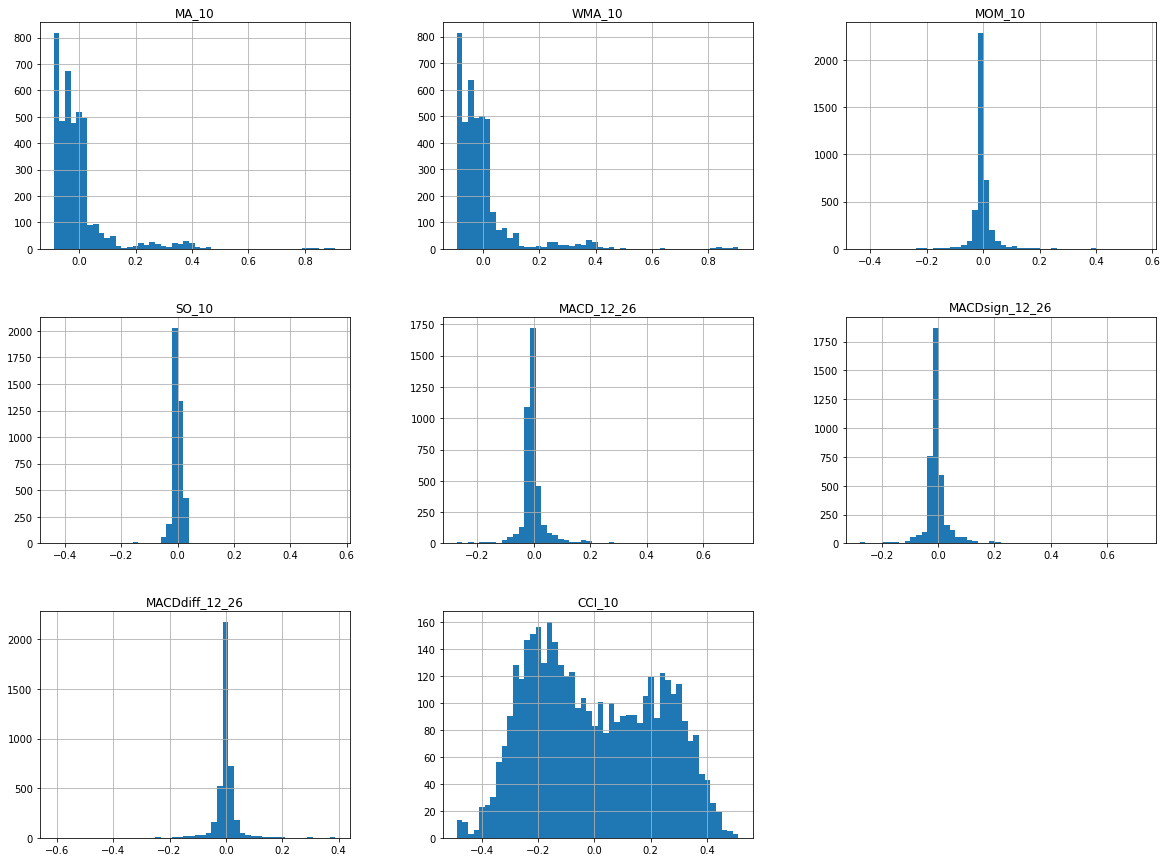

In [37]:
X.hist(bins=50,figsize=(20,15))

In [38]:
#Splitting data into training and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state = 0)

# Predicting using Decision Trees

In [39]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
Regressor = DecisionTreeRegressor(max_depth=10)
Regressor.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=10,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## Evaluating the Model

In [40]:
y_pred = Regressor.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
rmse

0.007547827051790224

# Using Bagging Regressor

In [41]:
#import necessary libraries
from sklearn.ensemble import BaggingRegressor

In [42]:
regr = BaggingRegressor(base_estimator=Regressor,
n_estimators=50, random_state=0)
regr.fit(x_train,y_train)
    

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='mse',
                                                      max_depth=10,
                                                      max_features=None,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=0.0,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=1,
                                                      min_samples_split=2,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=None,
                                                      splitter='best'),
                 bootstrap=Tru

## Evaluating Bagging Regressor

In [43]:
y_pred_br = regr.predict(x_test)

In [44]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_br)
rmse = np.sqrt(mse)
rmse

0.004714742436707624

# Using Random Forest

In [45]:
#importing the libraries
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50,max_depth=10,random_state=1)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

## Evaluating Random Forest

In [46]:
y_pred_rf = rf.predict(x_test)


In [47]:
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_rf)
rmse = np.sqrt(mse)
rmse

0.005202035540666753

 ## Using AdaBoost Regressor

In [48]:
#importing necessary libraries
from sklearn.ensemble import AdaBoostRegressor
adb_reg = AdaBoostRegressor(base_estimator=Regressor,n_estimators=100,learning_rate=0.1)
adb_reg.fit(x_train,y_train)



AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=10,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                 

## Evaluating AdaBoost Regressor

In [49]:
y_pred_adb = adb_reg.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_adb)
rmse = np.sqrt(mse)
rmse

0.004527677395857055

## Using Gradient Boosting

In [50]:
#importing necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
gdbt = GradientBoostingRegressor(max_depth=10,learning_rate=0.1,n_estimators=50,random_state=1)
gdbt.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

## Evaluating gradient boosting

In [51]:
y_pred_gdbt = gdbt.predict(x_test)
from sklearn.metrics import r2_score,mean_squared_error
mse = mean_squared_error(y_test,y_pred_gdbt)
rmse = np.sqrt(mse)
rmse

0.005066272088080557

## Using XGBoost

In [52]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

##Using Deep Learning Models

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Training and testing set

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.1,random_state = 0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3678, 8) (409, 8) (3678,) (409,)


In [55]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train_scaled = sc.fit_transform(x_train)

In [56]:
X_train, Y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Using ANN

### Importing Libraries

In [57]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix 

### Building the ANN Model


In [58]:
classifier = Sequential() 
classifier.add(Dense(units=50,activation = "relu",input_shape = (X_train.shape[1], 1))) 
classifier.add(Dense(units=50,activation = "relu")) 
classifier.add(Dense(activation = "sigmoid", units = 1)) 
classifier.compile(optimizer = 'adam' , loss = 'mean_squared_error' ) 

In [59]:
classifier.fit(X_train, Y_train, epochs = 15, batch_size = 32)

Epoch 1/15
115/115 [==============================] - 0s 2ms/step - loss: 0.1021
Epoch 2/15
115/115 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 3/15
115/115 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 4/15
115/115 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 5/15
115/115 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 6/15
115/115 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 7/15
115/115 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 8/15
115/115 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 9/15
115/115 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 10/15
115/115 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 11/15
115/115 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 12/15
115/115 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 13/15
115/115 [====

In [60]:
X_test = np.array(x_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = classifier.predict(X_test)

In [61]:
real_stock_price = np.asarray(y_test)
# real_stock_price=real_stock_price.reshape(1167,1)

In [62]:
predicted_stock_price

array([[[2.2967160e-03],
        [2.2969544e-03],
        [2.1291375e-03],
        ...,
        [2.1333694e-03],
        [2.1397471e-03],
        [1.1660912e-05]],

       [[1.7901361e-03],
        [1.8066466e-03],
        [2.2571683e-03],
        ...,
        [1.6842484e-03],
        [3.2550991e-03],
        [8.0215931e-03]],

       [[1.0564923e-03],
        [1.0561049e-03],
        [9.8963082e-03],
        ...,
        [6.9733560e-03],
        [8.7471604e-03],
        [1.5092519e-01]],

       ...,

       [[6.9171190e-04],
        [6.6947937e-04],
        [2.1388233e-03],
        ...,
        [1.8826127e-03],
        [2.4199188e-03],
        [1.1844822e-04]],

       [[5.7253242e-04],
        [5.5751204e-04],
        [3.3236742e-03],
        ...,
        [2.7795434e-03],
        [3.4533143e-03],
        [2.6965392e-01]],

       [[4.4687688e-03],
        [4.4836700e-03],
        [2.2571683e-03],
        ...,
        [1.8446743e-03],
        [2.9046834e-03],
        [9.5420750e-05]]

In [63]:
real_stock_price

array([-9.07846464e-03, -1.78499763e-02, -3.08642300e-02, -5.53672571e-02,
       -4.46888951e-02, -8.30165873e-02, -7.87738453e-02,  3.76391336e-01,
       -6.90965797e-02,  3.55441899e-03, -8.53524790e-02, -7.95365854e-02,
       -6.49491802e-02,  2.84624162e-01, -8.20631622e-02, -7.03837037e-02,
        3.58323928e-01,  1.59989737e-03, -6.58549341e-02, -3.00538186e-02,
        5.90339946e-01,  1.14678480e-02,  3.07697051e-01, -3.88253303e-02,
       -4.07298245e-03, -7.35994316e-04,  6.85303450e-02, -3.41535469e-02,
       -5.77031488e-02,  5.93798194e-03, -6.75710994e-02, -6.76187707e-02,
       -2.81946395e-02, -7.72960363e-02, -9.41216345e-03, -2.56203915e-02,
       -4.42598538e-02, -5.15535564e-02,  3.32009393e-01, -2.63354604e-02,
       -3.83486177e-02,  6.21183251e-01,  2.64842946e-02, -4.04938243e-02,
       -2.46669663e-02, -4.14949208e-02, -3.64394112e-03, -6.09924657e-02,
       -2.91957359e-02,  3.93578907e-03, -2.69051594e-03, -8.26352173e-02,
        4.02419843e-01, -

In [64]:
""" plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction Using ANN')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show() """ #error

" plt.figure(figsize=(20,10))\nplt.plot(real_stock_price, color = 'green', label = 'Stock Price')\nplt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')\nplt.title('Stock Price Prediction Using ANN')\nplt.xlabel('Trading Day')\nplt.ylabel('Stock Price')\nplt.legend()\nplt.show() "

## Using LSTM

### Importing libraries

In [65]:
pip install nsepy

  Created wheel for nsepy: filename=nsepy-0.8-cp36-none-any.whl size=36085 sha256=f997572b6760e01bf6a5015292b78e9ad32b68e41a42df5bf50c93bb0a3e932d
  Stored in directory: /root/.cache/pip/wheels/05/2c/72/5324e267426eea65dec0c21a12a48b15887c0cf686c7a8fe11
Successfully built nsepy


In [66]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Building the LSTM

In [67]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

### Compiling and training the model defined in the above step.
(Iteratively, we can increase or decrease the epochs and batch size to get more accuracy.)

In [68]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs = 15, batch_size = 32)

Epoch 1/15
115/115 [==============================] - 2s 19ms/step - loss: 0.0022
Epoch 2/15
115/115 [==============================] - 2s 19ms/step - loss: 4.5860e-04
Epoch 3/15
115/115 [==============================] - 2s 19ms/step - loss: 4.2303e-04
Epoch 4/15
115/115 [==============================] - 2s 19ms/step - loss: 3.4729e-04
Epoch 5/15
115/115 [==============================] - 2s 19ms/step - loss: 3.0075e-04
Epoch 6/15
115/115 [==============================] - 2s 19ms/step - loss: 4.1637e-04
Epoch 7/15
115/115 [==============================] - 2s 19ms/step - loss: 3.2197e-04
Epoch 8/15
115/115 [==============================] - 2s 19ms/step - loss: 2.9630e-04
Epoch 9/15
115/115 [==============================] - 2s 19ms/step - loss: 2.9069e-04
Epoch 10/15
115/115 [==============================] - 2s 18ms/step - loss: 3.4804e-04
Epoch 11/15
115/115 [==============================] - 2s 18ms/step - loss: 3.7833e-04
Epoch 12/15
115/115 [==============================] - 2

In [69]:
X_test = np.array(x_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)

In [70]:
real_stock_price = np.asarray(y_test)
# real_stock_price=real_stock_price.reshape(1167,1)

In [71]:
predicted_stock_price

array([[-2.33833771e-02],
       [-3.28548998e-02],
       [-3.86820063e-02],
       [-6.60331249e-02],
       [-5.46642542e-02],
       [-9.01935399e-02],
       [-9.15576592e-02],
       [ 3.56889278e-01],
       [-7.84826502e-02],
       [-1.02723176e-02],
       [-9.50013399e-02],
       [-9.19645354e-02],
       [-7.20058456e-02],
       [ 2.70236224e-01],
       [-8.63657668e-02],
       [-8.61267224e-02],
       [ 3.63987207e-01],
       [-1.51060838e-02],
       [-7.50869513e-02],
       [-4.33471799e-02],
       [ 6.02150083e-01],
       [-8.81133135e-03],
       [ 2.76749074e-01],
       [-5.70498742e-02],
       [-1.67867951e-02],
       [-1.53778736e-02],
       [ 5.81951328e-02],
       [-4.70556691e-02],
       [-6.56548887e-02],
       [-9.50376038e-03],
       [-7.66544789e-02],
       [-8.04777592e-02],
       [-4.01581340e-02],
       [-8.56913701e-02],
       [-2.17599999e-02],
       [-4.07008119e-02],
       [-5.52986749e-02],
       [-5.81587106e-02],
       [ 3.1

In [72]:
real_stock_price

array([-9.07846464e-03, -1.78499763e-02, -3.08642300e-02, -5.53672571e-02,
       -4.46888951e-02, -8.30165873e-02, -7.87738453e-02,  3.76391336e-01,
       -6.90965797e-02,  3.55441899e-03, -8.53524790e-02, -7.95365854e-02,
       -6.49491802e-02,  2.84624162e-01, -8.20631622e-02, -7.03837037e-02,
        3.58323928e-01,  1.59989737e-03, -6.58549341e-02, -3.00538186e-02,
        5.90339946e-01,  1.14678480e-02,  3.07697051e-01, -3.88253303e-02,
       -4.07298245e-03, -7.35994316e-04,  6.85303450e-02, -3.41535469e-02,
       -5.77031488e-02,  5.93798194e-03, -6.75710994e-02, -6.76187707e-02,
       -2.81946395e-02, -7.72960363e-02, -9.41216345e-03, -2.56203915e-02,
       -4.42598538e-02, -5.15535564e-02,  3.32009393e-01, -2.63354604e-02,
       -3.83486177e-02,  6.21183251e-01,  2.64842946e-02, -4.04938243e-02,
       -2.46669663e-02, -4.14949208e-02, -3.64394112e-03, -6.09924657e-02,
       -2.91957359e-02,  3.93578907e-03, -2.69051594e-03, -8.26352173e-02,
        4.02419843e-01, -

### Plotting the results

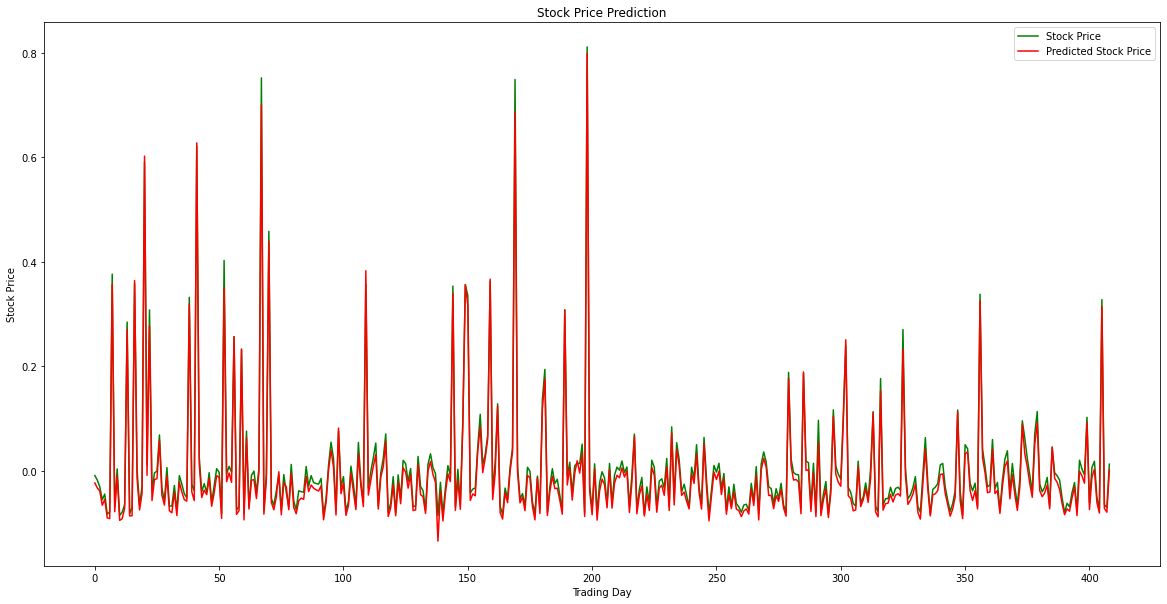

In [73]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error as MSE
rmse = MSE(real_stock_price,predicted_stock_price)**(1/2)
rmse

0.013857489299441231